![banner_eda](https://github.com/cistelsa/Commerce_Data_Analysis_and_Recommendations/blob/main/5_Sources/Images/banner_eda.gif?raw=true)

<p align="center">

## **Normalización de Datos - EDA**

</p>

Se evidencia que en varias columnas su contenido está estructurado como diccionario y como formato JSON, la prioridad es analizar estas columnas si son datos relevantes y si es posible desanidarlas en el mismo dataset sin repetir datos se realiza.

<mark>Parte de este script será reutilizado para agregar a la automatización</mark>

**`Importante:`** Para que este **EDA** se pueda realizar es necesario tener en cuenta la data analizada de `EDA_hotelbeads_details.ipynb` a su vez el diccionario de datos realizado en [Excel aquí](https://docs.google.com/spreadsheets/d/1Cb9qUBbyXu-8US3OhfAiyZLHjSJrZstZ/edit?usp=sharing&ouid=105689737903283188966&rtpof=true&sd=true).

>Al Manejar Grandes cantidades de Datos el PC local comienza a limitarse en memoria RAM y en Procesador por lo cual realizamos la toma de una muestra de uno de los lotes de datasets (1 archivo JSON) y procesamos el script pertinente, luego realizamos la carga de los archivos en el entorno de Microsoft Fabric para que cubra estas falencias.

In [ ]:
pip install geopandas #Instalando geopandas

StatementMeta(, , , Waiting, )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 11.5/16.4 MB 181.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 7.3/8.3 MB 111.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 87.4 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Usaremos librería Pandas y Json para permitir la lectura de los archivos
import pandas as pd
import json

StatementMeta(, , , Waiting, )

In [2]:
# Ruta base donde se encuentran los archivos JSON
path_base = "/lakehouse/default/Files/data/original/HotelBeds/"

StatementMeta(, , , Waiting, )

### Realizamos lectura del dataset

In [3]:
# Hacemos lectura del dataset en csv previamente extraido.
df_hotels_c = pd.read_json(path_base + "hotels_dataset.json")

StatementMeta(, , , Waiting, )

In [4]:
# Revisamos su estructura, tipos de datos
df_hotels_c.info()

StatementMeta(, , , Waiting, )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39963 entries, 0 to 39962
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   code                   39963 non-null  int64 
 1   name                   39963 non-null  object
 2   description            39923 non-null  object
 3   countryCode            39963 non-null  object
 4   stateCode              39963 non-null  object
 5   destinationCode        39963 non-null  object
 6   zoneCode               39963 non-null  int64 
 7   coordinates            39963 non-null  object
 8   categoryCode           39963 non-null  object
 9   categoryGroupCode      39876 non-null  object
 10  chainCode              33551 non-null  object
 11  accommodationTypeCode  39963 non-null  object
 12  boardCodes             38280 non-null  object
 13  segmentCodes           39166 non-null  object
 14  address                39963 non-null  object
 15  postalCode         

Analizamos columnas como `license` revisamos el diccionario de datos y es una licencia interna de Hotelbeds, vemos que los campos vacíos están en más del 99% por lo cual se considera eliminar la columna, tampoco es relevante para los KPIs y los objetivos.

In [5]:
df_hotels_c.head()
pd.options.display.max_columns=0

StatementMeta(, , , Waiting, )

Preparamos un script para poder determinar que columnas están anidadas en forma de diccionarios, listas o formatos JSON

In [6]:
# Define una función para determinar el tipo de contenido anidado
def determine_nested_type(cell):
    if isinstance(cell, list) and all(isinstance(item, dict) for item in cell):
        return 'Lista de diccionarios'
    elif isinstance(cell, dict):
        return 'Diccionario'
    elif isinstance(cell, list):
        return 'Lista'
    
    return 'Desconocido'

# Crea un diccionario para almacenar los resultados por columna
results = {}

# Itera a través de las columnas del DataFrame original
for column in df_hotels_c.columns:
    # Inicializa un conjunto para esta columna (conjunto para eliminar duplicados)
    nesteds_type = set()
    
    # Itera a través de las celdas de la columna
    for cell in df_hotels_c[column]:
        # Determina el tipo de contenido anidado
        nested_type = determine_nested_type(cell)
        
        # Si el tipo no es "Desconocido", agrega al conjunto
        if nested_type != 'Desconocido':
            nesteds_type.add(nested_type)
    
    # Almacena el resultado para esta columna en el diccionario de resultados
    results[column] = ', '.join(nesteds_type) if nesteds_type else 'Ninguno'

# Crea un DataFrame a partir del diccionario de resultados
resume_df = pd.DataFrame(list(results.items()), columns=['Columnas', 'Tipos de Contenido Anidado'])

# Muestra el DataFrame resumen
print(resume_df)

StatementMeta(, , , Waiting, )

                 Columnas    Tipos de Contenido Anidado
0                    code                       Ninguno
1                    name                   Diccionario
2             description                   Diccionario
3             countryCode                       Ninguno
4               stateCode                       Ninguno
5         destinationCode                       Ninguno
6                zoneCode                       Ninguno
7             coordinates                   Diccionario
8            categoryCode                       Ninguno
9       categoryGroupCode                       Ninguno
10              chainCode                       Ninguno
11  accommodationTypeCode                       Ninguno
12             boardCodes                         Lista
13           segmentCodes  Lista, Lista de diccionarios
14                address                   Diccionario
15             postalCode                       Ninguno
16                   city                   Dicc

La **lista** unicamente son referencia de código que hace un llamado a otra tabla relacionada es el caso de `boardCodes` y `segmentCodes`

La **Lista de Diccionarios** hace un llamado a más parametros o descripciones de servicios que tiene el Hotel, estos se pueden manejar en su mayoría como una tabla relacionada, este es un proceso de ETL y normalizado de tablas.

Podemos observar que las columnas que son en forma de **Diccionarios** son: `name`, `description`, `coordinates`, `address`, `city` estas columnas se procede a desanidar para que quede en formato de string

In [7]:
# Define una función para extraer el contenido de 'content'
def extract_content(json_dict):
    if isinstance(json_dict, dict):
        return json_dict.get('content', '')
    else:
        return ''

StatementMeta(, , , Waiting, )

In [8]:
# Aplica la función a la columna y crea una nueva columna con el contenido extraído
df_hotels_c['name'] = df_hotels_c['name'].apply(extract_content)
df_hotels_c['description'] = df_hotels_c['description'].apply(extract_content)
df_hotels_c['address'] = df_hotels_c['address'].apply(extract_content)
df_hotels_c['city'] = df_hotels_c['city'].apply(extract_content)

StatementMeta(, , , Waiting, )

In [9]:
# Separamos coordinates en dos columnas respectivamente longitude y latitude
def extract_longitude(json_dict):
    if isinstance(json_dict, dict):
        return json_dict.get('longitude', '')
    else:
        return ''
    
def extract_latitude(json_dict):
    if isinstance(json_dict, dict):
        return json_dict.get('latitude', '')
    else:
        return ''

StatementMeta(, , , Waiting, )

In [10]:
# Aplicamos la Función
df_hotels_c['longitude'] = df_hotels_c['coordinates'].apply(extract_longitude)
df_hotels_c['latitude'] = df_hotels_c['coordinates'].apply(extract_latitude)

StatementMeta(, , , Waiting, )

Eliminamos algunas columnas que ya se encuentran en el dataset de `hotels_details_dataset.csv`, es el caso de `terminals, issues, wildcards, images, interestPoints, facilities, rooms` en otros casos como el de `license` por tener el 99% de campos vacíos se procede a eliminar la columna ya verificando que los datos no son relevantes, `coordinates` se elimina ya que se dividión en dos columnas.

In [11]:
# Eliminar columnas con datos null: 'terminals', 'license', 'issues', 'wildcards', 'images', 'interestPoints', 'facilities', 'rooms'
df_hotels_c = df_hotels_c.drop(columns=['terminals', 'license', 'issues', 'wildcards', 'images', 'interestPoints', 'facilities', 'rooms'])
# Eliminar Columna ya gestionada y dividida
df_hotels_c = df_hotels_c.drop(columns=['coordinates'])

StatementMeta(, , , Waiting, )

In [12]:
df_hotels_c.head()

StatementMeta(, , , Waiting, )

,code,name,description,countryCode,stateCode,destinationCode,zoneCode,categoryCode,categoryGroupCode,chainCode,accommodationTypeCode,boardCodes,segmentCodes,address,postalCode,city,email,phones,web,lastUpdate,S2C,ranking,longitude,latitude
0,6474,Hilton Chicago,Our Hotel's Policies Have Changed ” Weve upda...,US,IL,ORD,2,4EST,GRUPO4,HILTO,H,"[BB, AI, HB, FB, RO, DB]","[34, 100, 102, 39, 45]",720 South Michigan Avenue,60605,CHICAGO,CHICH_GM@hilton.com,"[{'phoneNumber': '+13129224400', 'phoneType': ...",www3.hilton.com/en/hotels/illinois/hilton-chic...,2023-07-28,3*,47,-87.624400,41.872500
1,6478,Four Points by Sheraton Los Angeles Int'l Airport,This charming hotel is just a mile from LAX Ai...,US,CA,LAX,9,3EST,GRUPO3,MARIO,H,"[BB, RO]",[34],9750 Airport Boulevard,90045,LOS ANGELES,NaN,"[{'phoneNumber': '+0017147038800', 'phoneType'...",http://www.fourpointslax.com/la-airport-hotel,2023-07-28,3*,82,-118.385971,33.948050
2,6480,Sheraton Universal Hotel,"This upscale, landmark hotel enjoys an excitin...",US,CA,LAX,21,3EST,GRUPO3,MARIO,H,"[BB, B2, RO]",[34],333 Universal Hollywood Drive,91608,UNIVERSAL CITY,NaN,"[{'phoneNumber': '+7145227000', 'phoneType': '...",NaN,2023-07-28,4*,119,-118.359553,34.137603
3,6483,Westin Copley Place,Experience one of Boston's most celebrated nei...,US,MA,BOS,2,H4_5,GRUPO4,MARIO,H,"[BB, RO]","[34, 39]",10 Huntington Avenue,2116,BOSTON,NaN,"[{'phoneNumber': '+16172879100', 'phoneType': ...",http://www.westincopleyplaceboston.com/,2023-07-28,3*,62,-71.077539,42.348577
4,6487,Wyndham Garden New Orleans Airport,Wyndham Garden New Orleans Airport is perfectl...,US,LA,MSY,8,3EST,GRUPO3,WYNDH,H,"[BB, AI, HB, FB, RO]","[34, 39]",6401 Veterans Memorial Blvd,70003,METAIRIE,NaN,"[{'phoneNumber': '+15045240427', 'phoneType': ...",www.wyndhamhotels.com,2023-07-28,NaN,55,-90.122700,30.000000


In [ ]:
df_hotels_c.info()

StatementMeta(, , , Waiting, )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39963 entries, 0 to 39962
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   39963 non-null  int64  
 1   name                   39963 non-null  object 
 2   description            39963 non-null  object 
 3   countryCode            39963 non-null  object 
 4   stateCode              39963 non-null  object 
 5   destinationCode        39963 non-null  object 
 6   zoneCode               39963 non-null  int64  
 7   categoryCode           39963 non-null  object 
 8   categoryGroupCode      39876 non-null  object 
 9   chainCode              33551 non-null  object 
 10  accommodationTypeCode  39963 non-null  object 
 11  boardCodes             38280 non-null  object 
 12  segmentCodes           39166 non-null  object 
 13  address                39963 non-null  object 
 14  postalCode             39904 non-null  object 
 15  ci

<h2>Importando las librerias para realizar EDA</h2>

In [ ]:
from datetime import datetime
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar en mapa con latitud y longitud
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as colors

StatementMeta(, , , Waiting, )

In [ ]:
#visualizando la cantidad de filasy columnas del conjunto de datos
df_hotels_c.shape

StatementMeta(, , , Waiting, )

(39963, 24)

Se realiza un heatmap para visualizar los campos que contegan valores nulos

StatementMeta(, , , Waiting, )

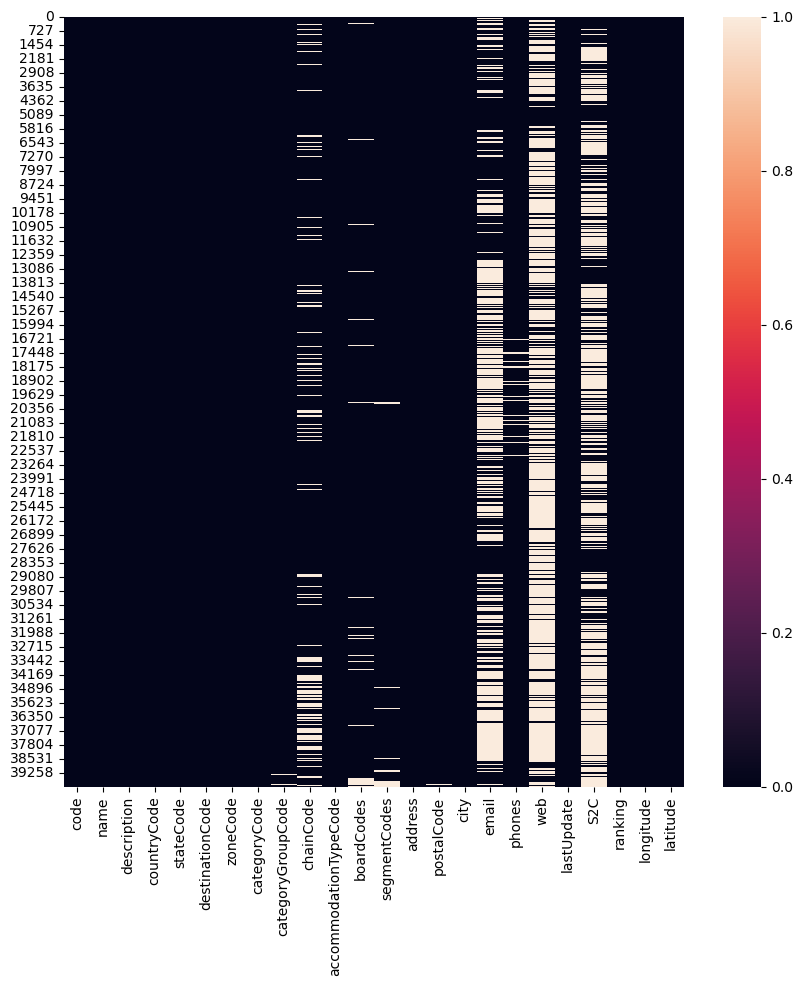

In [ ]:
#Graficando mapa de calor para conocer visualmente la existencia de valores nulos
plt.figure(figsize=[10,10])
sns.heatmap(df_hotels_c.isnull()) 
plt.show()

In [ ]:
#Eliminando las columnas email y web por presentar gran cantidad de valores nulos y no ser utilizadas para análisis posteriores
df_hotels_c = df_hotels_c.drop(['email', 'web'], axis=1)

StatementMeta(, , , Waiting, )

Se destacan las columnas "email", "web" y "s2c", pues estas se encuentran sin una gran cantidad de datos, por lo tanto se toma la decisión de eliminar "email" y "web" pues no se empleará para realizar análisis posteriores. Se conserva S2C pues hace referencia a la calificación de salud y seguridad para cada uno de los registros.

Por tanto tenemos un dataframe de 39963 registros y 21 columnas

Posteriormente, se procede a gráficar un heatmap para conocer si existe correlación entre las variables numéricas.

StatementMeta(, , , Waiting, )

<AxesSubplot: >

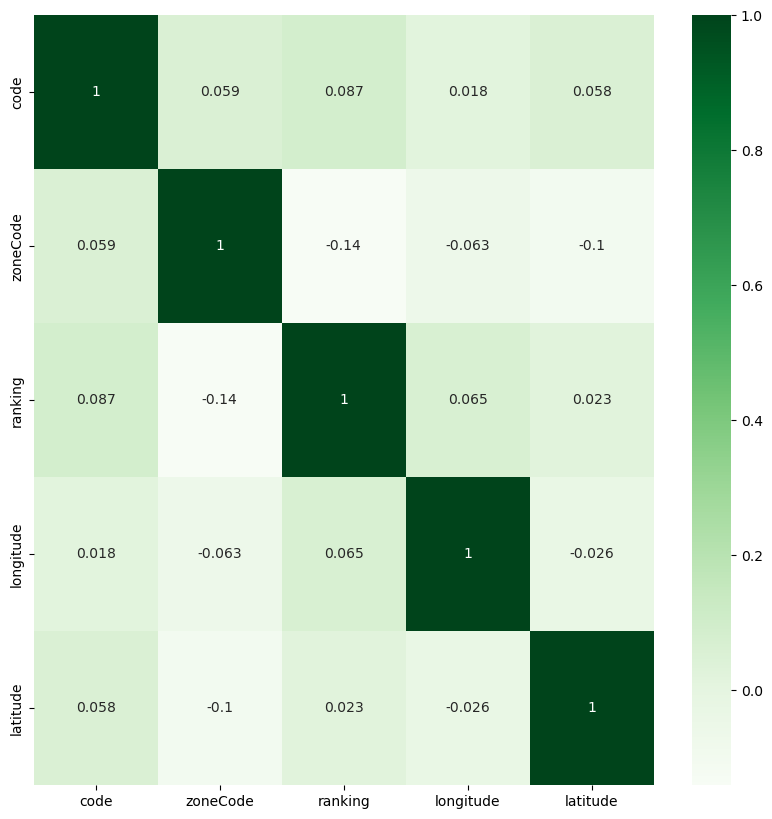

In [ ]:
#Gráficando heatmap para conocer la correlación de las variables
correlac = df_hotels_c.corr(numeric_only = True)
plt.figure(figsize=[10,10])
sns.heatmap(correlac, annot=True, cmap='Greens')

Observando el gráfico, podemos concluir que las variables no se encuentran correlacionadas en un rango significativo pues el valor más alto de correlación es de 0.087 que se da entre 'code' y 'rating'.


Continuando con el análisis se procede a calcular frecuencia y visualización de la calificación (ranking) presentadas por la plataforma "hotelbeds" .

<p>Posteriormente, se calcula el número de hoteles en cada estado para visualizarlo a travès de un histograma de frecuencia</p>

In [55]:
#Calculando el número de hoteles por estado
num_hotels = df_hotels_c.groupby('stateCode')['name'].count().reset_index(name='Hoteles')
num_hotels

StatementMeta(, 82029887-8e16-4658-aba6-f42879f46d72, 57, Finished, Available)

,stateCode,Hoteles
0,AK,112
1,AL,680
2,AR,470
3,AZ,872
4,CA,4211
5,CO,944
6,CT,255
7,DC,156
8,DE,104
9,FL,3052


<p>Se procede a gráficar el histograma de frecuencia</p>

StatementMeta(, , , Waiting, )

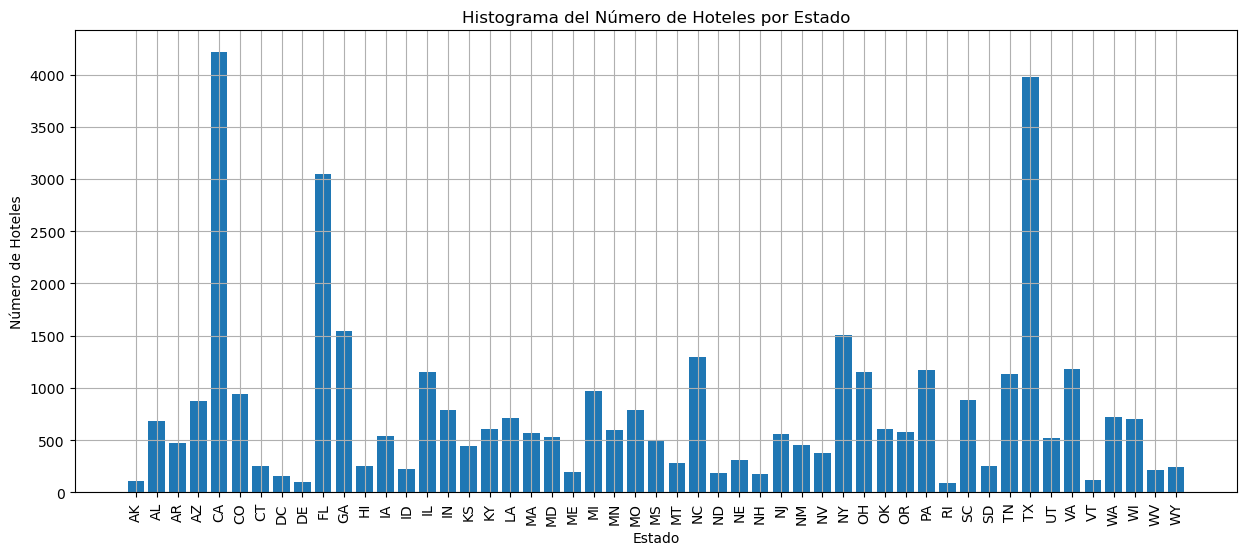

In [ ]:
#Gráficando el histograma de frecuencia
plt.figure(figsize=(15, 6))
plt.bar(num_hotels['stateCode'], num_hotels['Hoteles'])
plt.xlabel('Estado')
plt.ylabel('Número de Hoteles')
plt.title('Histograma del Número de Hoteles por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Se observa que los estados con mayor cantidad de hoteles son Carolina (CA) con 4211, Texas (Tx) con 3973 y Florida (FL) con 3052

Calculando los mejores hoteles por estado

In [ ]:
#Calculando la cantidad de hoteles con mejor puntuación por estado
hotel_kings = df_hotels_c[df_hotels_c['ranking'] <= 2]
hotel_kings = hotel_kings.groupby(['stateCode'])['stateCode'].count().reset_index(name='Hoteles')
hotel_kings

StatementMeta(, , , Waiting, )

,stateCode,Hoteles
0,AK,17
1,AL,44
2,AR,17
3,AZ,43
4,CA,115
5,CO,46
6,CT,24
7,DC,2
8,DE,1
9,FL,67


StatementMeta(, , , Waiting, )

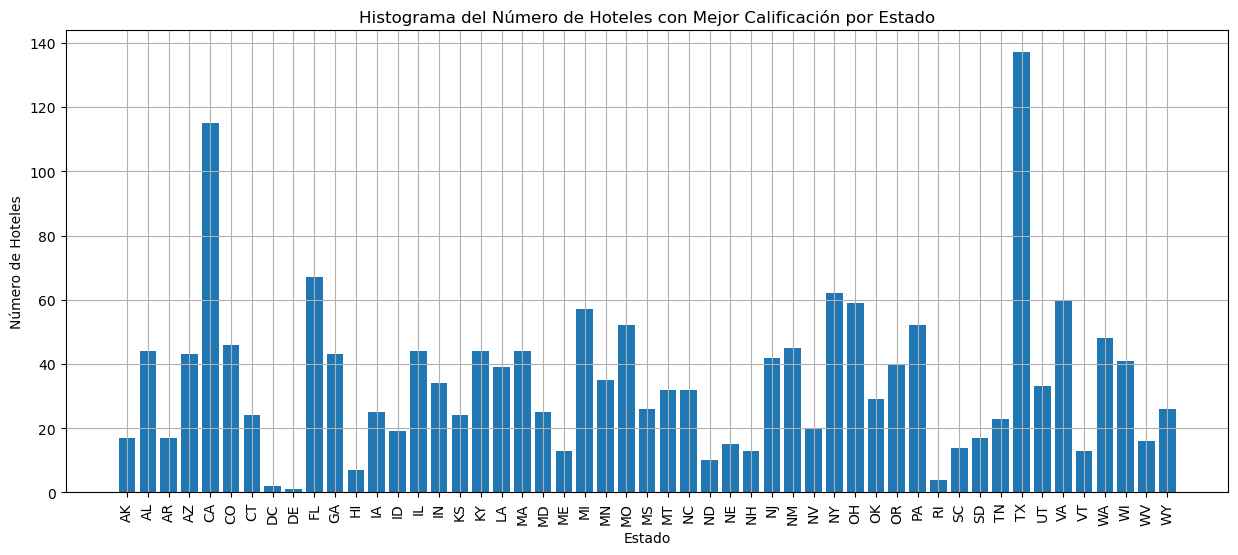

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(hotel_kings['stateCode'], hotel_kings['Hoteles'])
plt.xlabel('Estado')
plt.ylabel('Número de Hoteles')
plt.title('Histograma del Número de Hoteles con Mejor Calificación por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Este histograma se corresponde con el anterior, ya que California y Texas se llevan la mayor cantidad no solo en cuanto al total de hoteles sino a mejor calificación en cuanto al ranking establecido por HotelBeds.

Por otra parte, el estado Delaware, Washigton DC y Rhode Island tienen la menor cantidad de hoteles con mejor puntuación en el ranking.

Hoteles con mejor calificación en salud y seguridad

In [ ]:
#Reemplazando los caracteres especiales de la columna "S2C"
df_hotels_c['S2C'] = df_hotels_c['S2C'].str.replace('*','')

StatementMeta(, , , Waiting, )

/tmp/ipykernel_8232/219426012.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hotels_c['S2C'] = df_hotels_c['S2C'].str.replace('*','')


In [ ]:
#Cambiando el tipo de dato de la columna "S2C"
df_hotels_c['S2C']= df_hotels_c['S2C'].astype('float')

StatementMeta(, , , Waiting, )

In [ ]:
#Calculando la calificación promedio por estado
hotel_kings = df_hotels_c.groupby(['stateCode'])['S2C'].mean().reset_index(name='Hoteles')
hotel_kings

StatementMeta(, , , Waiting, )

,stateCode,Hoteles
0,AK,3.233333
1,AL,3.330275
2,AR,3.395683
3,AZ,3.276119
4,CA,3.233962
5,CO,3.283422
6,CT,3.289474
7,DC,3.449153
8,DE,3.342105
9,FL,3.373275


Visualizando a través de un gráfico de líneas

StatementMeta(, , , Waiting, )

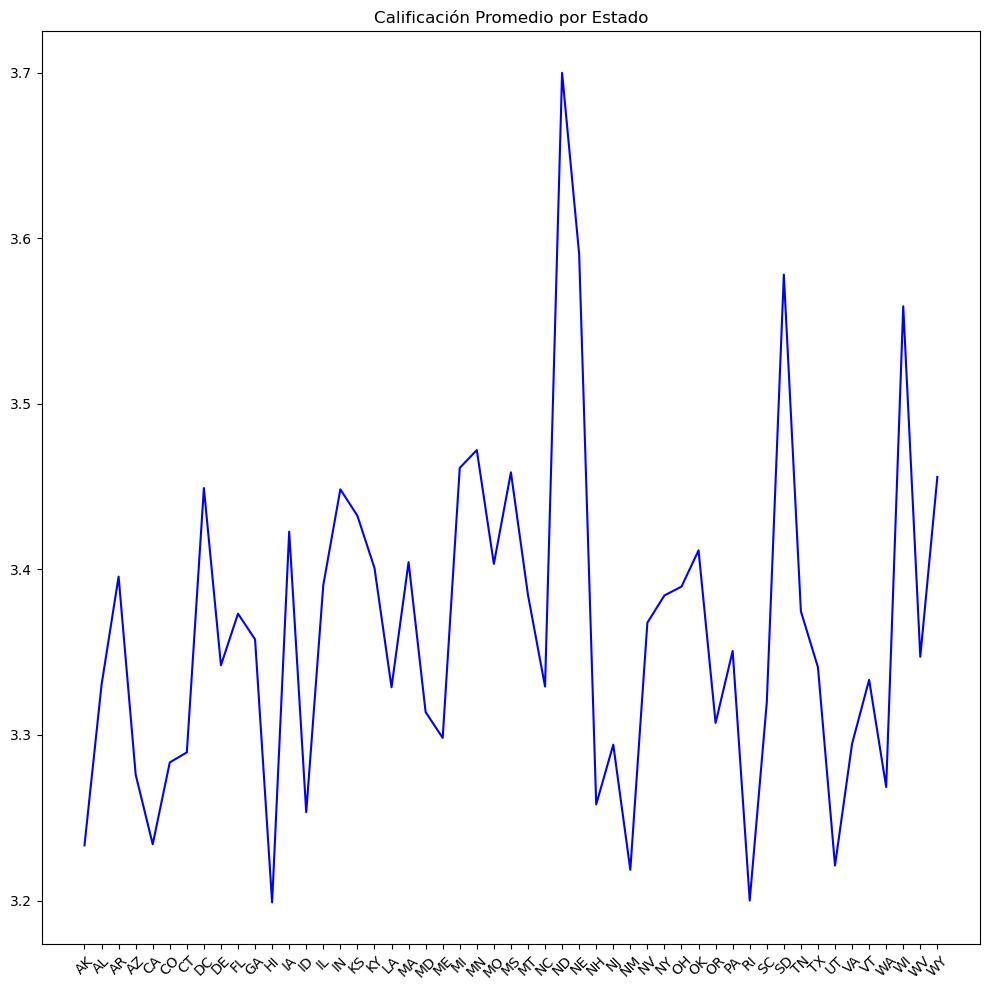

In [ ]:
#gráficando la calificaión promedio por estado
plt.figure(figsize=[10,10])
plt.title('Calificación Promedio por Estado')
plt.plot(hotel_kings['stateCode'],hotel_kings['Hoteles'], color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Finalmente, se procede a gráficar en un mapa los puntos a tráves de la latitud y longitud contenidos en el dataframe, y de esta forma conocer como se encuentran distribuidos los hoteles.

StatementMeta(, , , Waiting, )

/tmp/ipykernel_8232/1975192750.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Distribución por Estados')

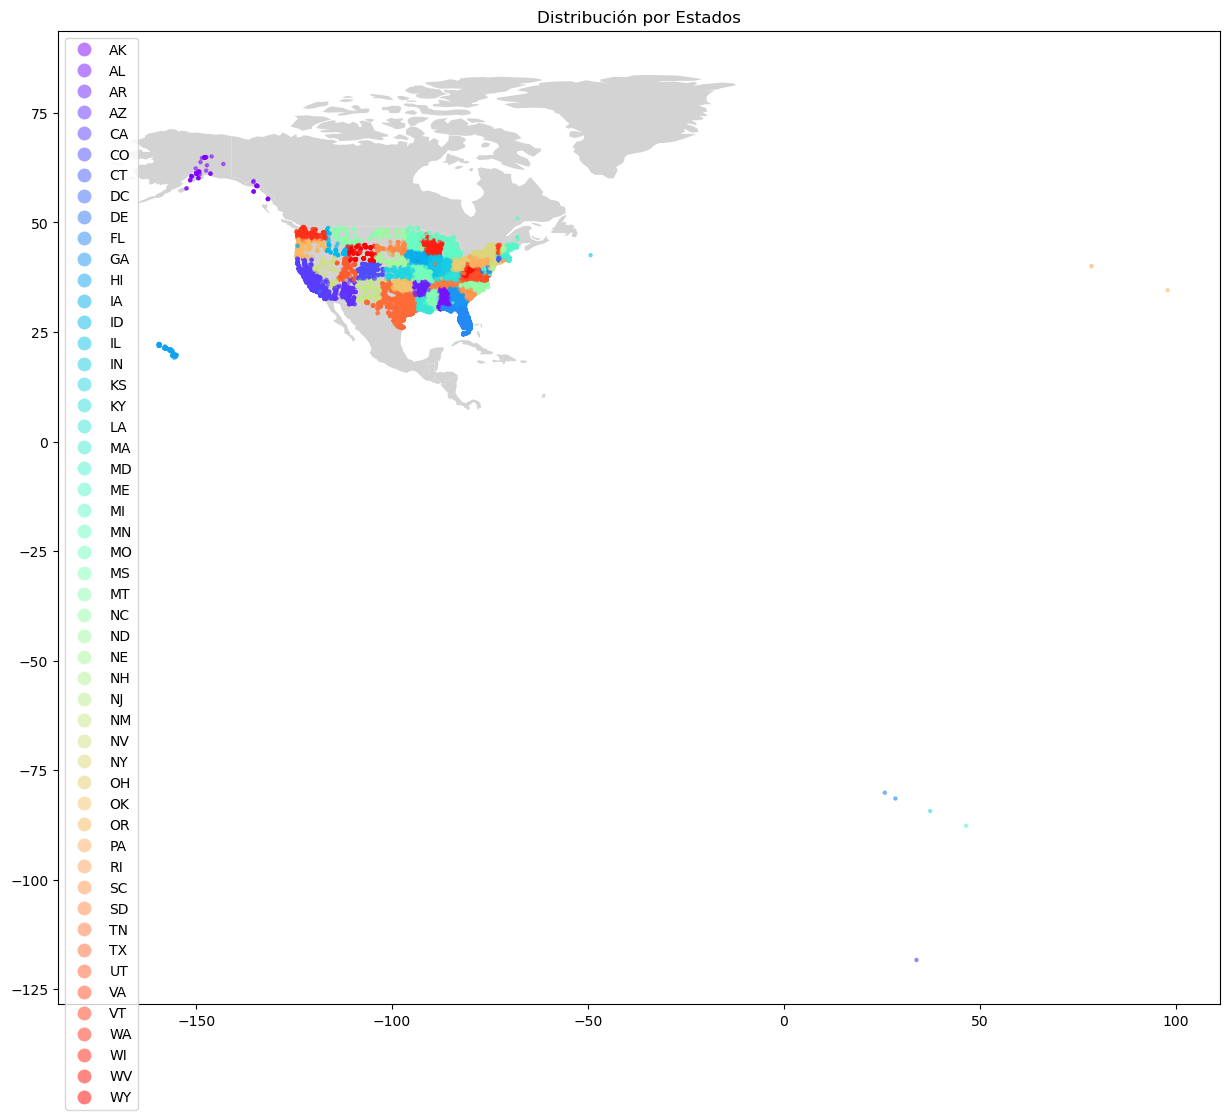

In [ ]:
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(df_hotels_c['longitude'], df_hotels_c['latitude'])]
geo_df = gpd.GeoDataFrame(df_hotels_c, 
                          crs = crs, 
                          geometry = geometry)

# Cargar un conjunto de datos geoespaciales del mundo predefinido
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

# Definir el sistema de referencia espacial (CRS)
north_america = north_america.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(15, 15))
north_america.plot(ax=ax, color='lightgrey')
#ax.axis([-180, 100, 25, 100])

# Crear el gráfico de puntos
scatter = geo_df.plot(column='stateCode', ax=ax, cmap='rainbow', legend = True,
                           markersize=5, alpha=0.5)

ax.set_title('Distribución por Estados')


Se observa que existen algunos valores por fuera de los límites de latitud y longitud establecidos de EE.UU, sin embargo no se excluirán del análisis, pues se deben ajustar estos en el área de ingeniería de datos.

Se genera el dataset para su uso en análisis posteriores.

In [ ]:
#Generando dataset hotel_beds.csv
df_hotels_c.to_csv("/lakehouse/default/Files/data/beta/Hotelbeds/hotel_beds.csv", index=False)


StatementMeta(, , , Waiting, )